In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
dataset = pd.read_csv("../Datasets/Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

In [5]:
MyRegression = LinearRegression().fit(X_train, y_train)
y_pred = MyRegression.predict(X_test)

Interpretar y-intercepto y pendiente

Esto indica el valor esperado de la variable dependiente y(Salary) cuando la variable independiente x1(YearsExperience) es cero aunque en este caso parece no tener sentido porque alguien que ha trabajado 0 años, no deberia tener un sueldo aún

In [6]:
print(MyRegression.intercept_) 

26816.192244031183


Indica que por cada año adicional de experiencia, se espera un aumento de aproximadamente $9345.94 en el salario.

In [7]:
print(MyRegression.coef_)

[9345.94244312]


Metricas

In [18]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSA:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 4585.4157204675885
MSA: 3426.4269374307078
R2: 0.9749154407708353


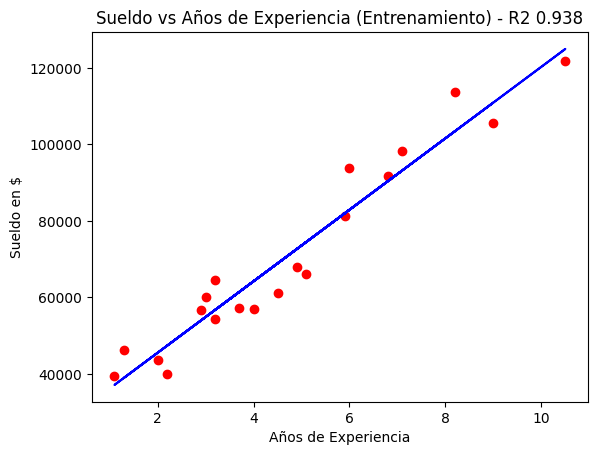

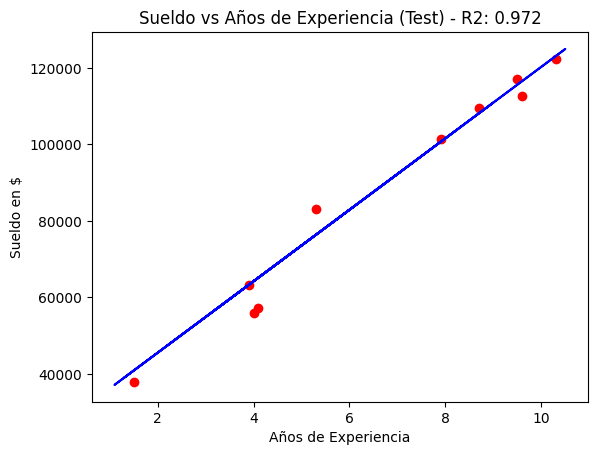

: 

In [20]:
def plot_regression(regressor, X, y, xlabel, ylabel, title):
    plt.scatter(X, y, color='red')
    plt.plot(X_train, regressor.predict(X_train), color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
plot_regression(MyRegression, X_train, y_train, 'Años de Experiencia', 'Sueldo en $', "Sueldo vs Años de Experiencia (Entrenamiento) - R2 {:.3f}".format(MyRegression.score(X_train, y_train)))
plot_regression(MyRegression, X_test, y_test, 'Años de Experiencia', 'Sueldo en $', 'Sueldo vs Años de Experiencia (Test) - R2: {:.3f}'.format(round(r2_score(y_pred, y_test),3)))
